In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the dataset
df=pd.read_csv('gurgaon_properties_cleanedv2.csv')
df.shape

(3803, 24)

In [4]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,...,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxuary_score
0,0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,...,1081.0,NaN,650.0,0,0,0,0,0,2,8
1,1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,...,NaN,NaN,1103.0,0,1,1,0,0,2,38
2,2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,...,NaN,NaN,58141.0,0,0,0,0,0,2,15
3,3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,...,NaN,1000.0,585.0,0,0,0,0,0,2,49
4,4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,...,1995.0,1615.0,1476.0,0,0,1,0,1,0,174


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3803 non-null   int64  
 1   property_type        3803 non-null   object 
 2   society              3802 non-null   object 
 3   sector               3803 non-null   object 
 4   price                3785 non-null   float64
 5   price_per_sqft       3785 non-null   float64
 6   area                 3785 non-null   float64
 7   areaWithType         3803 non-null   object 
 8   bedRoom              3803 non-null   int64  
 9   bathroom             3803 non-null   int64  
 10  balcony              3803 non-null   object 
 11  floorNum             3784 non-null   float64
 12  facing               2698 non-null   object 
 13  agePossession        3803 non-null   object 
 14  super_built_up_area  1915 non-null   float64
 15  built_up_area        1733 non-null   f

<Axes: xlabel='property_type'>

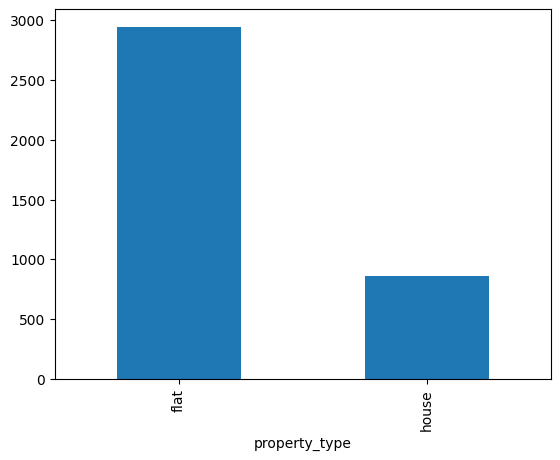

In [6]:
#property_type
df['property_type'].value_counts().plot(kind='bar')

Observations

Flats are in majority(75 percent) and there are less 

number of houses(~25 percent)

No missing values

In [7]:
#society
df['society'].value_counts().shape

(676,)

In [8]:
df['society'].value_counts()

society
independent                               486
tulip violet                               75
ss the leaf                                74
shapoorji pallonji joyville gurugram       45
dlf new town heights                       42
                                         ... 
samadhan shri kamal cghs                    1
private house                               1
elevate                                     1
dlf pink town house                         1
surendra homes dayaindependentd colony      1
Name: count, Length: 676, dtype: int64

In [9]:
df[df['society']!='independent']['society'].value_counts(normalize=True)

society
tulip violet                              0.022618
ss the leaf                               0.022316
shapoorji pallonji joyville gurugram      0.013571
dlf new town heights                      0.012666
signature global park                     0.011158
                                            ...   
samadhan shri kamal cghs                  0.000302
private house                             0.000302
elevate                                   0.000302
dlf pink town house                       0.000302
surendra homes dayaindependentd colony    0.000302
Name: proportion, Length: 675, dtype: float64

In [10]:
society_counts=df['society'].value_counts()

In [11]:
#Frequency distribution for the society
frequency_bins={
    
    "very high (>100)":(society_counts>100).sum(),
    "High (50-100)":((society_counts>=50)&(society_counts<=100)).sum(),
    "Average (10-49)":((society_counts>=10)&(society_counts<50)).sum(),
    "Low (2-9)":((society_counts>1)&(society_counts<10)).sum(),
    "Very Low (1)":(society_counts==1).sum()
}
frequency_bins

{'very high (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 97,
 'Low (2-9)': 285,
 'Very Low (1)': 291}

<Axes: xlabel='society'>

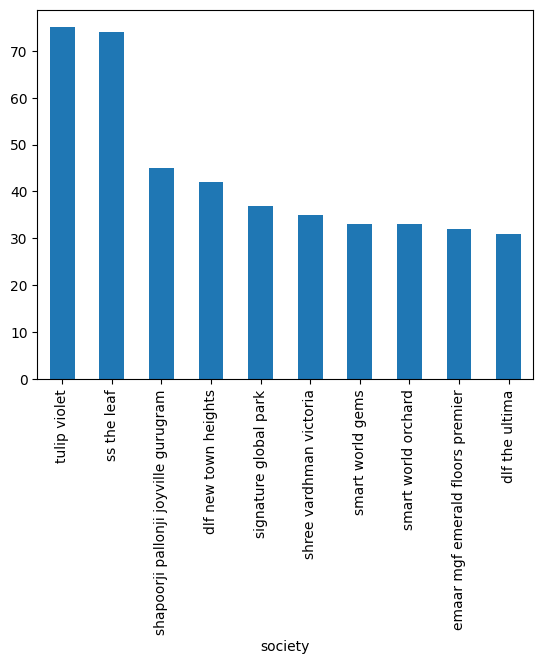

In [12]:
#top 10 societies
df[df['society']!='independent']['society'].value_counts().head(10).plot(kind='bar')

In [13]:
df['society'].isnull().sum()

1

In [15]:
df[df['society'].isnull()]

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,...,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxuary_score
2693,2693,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,...,NaN,1625.0,NaN,0,0,0,0,0,2,0


Observations

Around 13% properties comes under independent tag.

There are 675 societies.

The top 75 societies have 50 percent of the preperties 

and the rest 50 percent of the properties come under the 

remaining 600 societies

Very High (>100): Only 1 society has more than 100 

listings.

High (50-100): 2 societies have between 50 to 100 

listings.

Average (10-49): 92 societies fall in this range with 10 

to 49 listings each.

Low (2-9): 273 societies have between 2 to 9 listings.

Very Low (1): A significant number, 308 societies, have 

only 1 listing.

1 missing value

In [16]:
#sector
#unique sectors
df['sector'].value_counts().shape

(104,)

<Axes: xlabel='sector'>

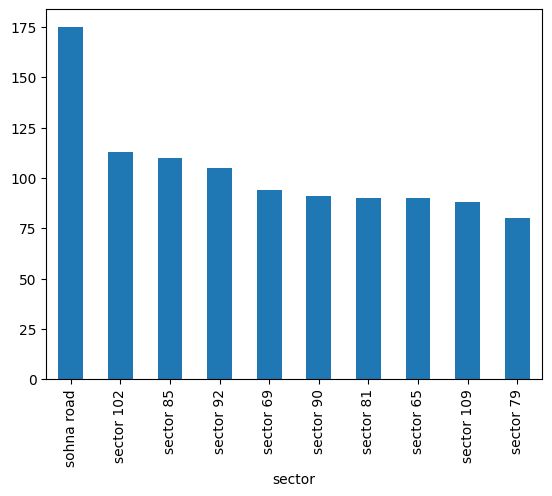

In [17]:
#top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [19]:
#Frequency distribution for sectors
sector_counts=df['sector'].value_counts()
sector_frequncy={
    "very high(>100)":(sector_counts>100).sum(),
    "High (50-100)":((sector_counts>=50)&(sector_counts<=100)).sum(),
    "Average (10-49)":((sector_counts>=10)&(sector_counts<50)).sum(),
    "Low (2-9)":((sector_counts>1)&(sector_counts<10)).sum(),
    "Very Low (1)":(sector_counts==1).sum()
}
sector_frequncy

{'very high(>100)': 4,
 'High (50-100)': 25,
 'Average (10-49)': 59,
 'Low (2-9)': 16,
 'Very Low (1)': 0}

Observations

There are a total of 104 unique sectors in the dataset.

Frequency distribution of sectors:

Very High (>100): 3 sectors have more than 100 listings.

High (50-100): 25 sectors have between 50 to 100 

listings.

Average (10-49): A majority, 60 sectors, fall in this 

range with 10 to 49 listings each.

Low (2-9): 16 sectors have between 2 to 9 listings.

Very Low (1): Interestingly, there are no sectors with 

only 1 listing

In [20]:
#Price
df['price'].isnull().sum()

18

In [21]:
df['price'].describe()

count    3785.000000
mean        2.505804
std         2.950121
min         0.070000
25%         0.940000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

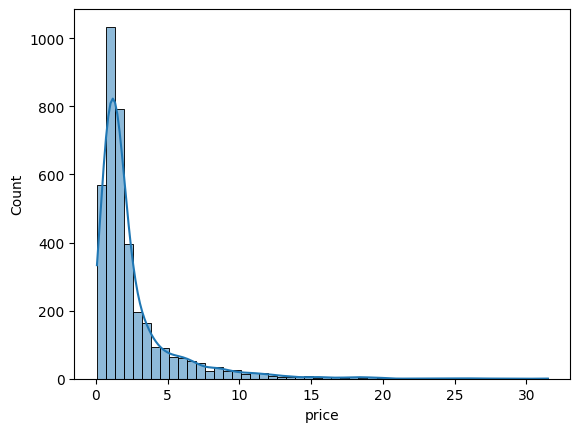

In [22]:
sns.histplot(df['price'],kde=True,bins=50)

<Axes: xlabel='price'>

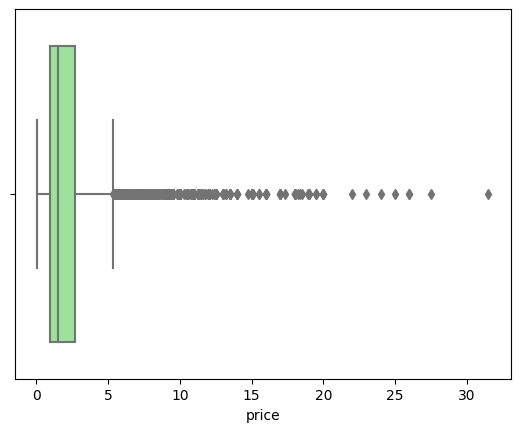

In [23]:
sns.boxplot(x=df['price'],color='lightgreen')

In [24]:
#skewness and kurtosis
skewness=df['price'].skew()
kurtosis=df['price'].kurt()
print(skewness,kurtosis)

3.3113346542178137 15.257818585808831


In [25]:
#quantile analysis
quantiles=df['price'].quantile([0.01, 0.05, 0.95, 0.99])
quantiles

0.01     0.250
0.05     0.370
0.95     8.490
0.99    15.016
Name: price, dtype: float64

In [26]:
#identify potential outlier by using the IQR method
Q1=df['price'].describe()['25%']
Q3=df['price'].describe()['75%']
IQR=Q3-Q1
IQR

1.7600000000000002

In [27]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound,upper_bound)

-1.7000000000000006 5.340000000000001


In [29]:
outliers=df[(df['price']<lower_bound)| (df['price']>upper_bound)]
outliers.shape

(432, 24)

In [30]:
outliers['price'].describe()

count    432.000000
mean       9.196157
std        4.061291
min        5.350000
25%        6.400000
50%        8.000000
75%       10.607500
max       31.500000
Name: price, dtype: float64

<Axes: xlabel='price'>

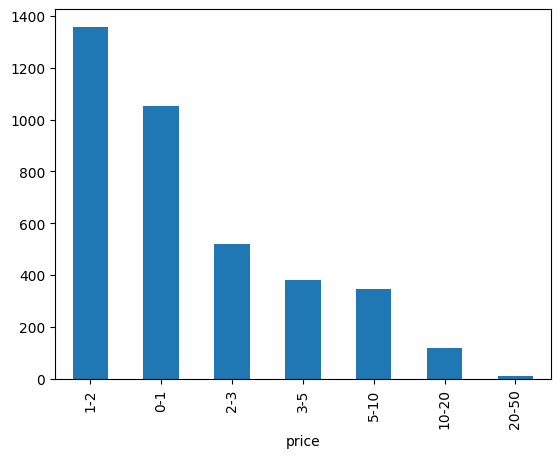

In [32]:
#price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'],bins=bins,labels=bin_labels,right=False).value_counts().plot(kind='bar')

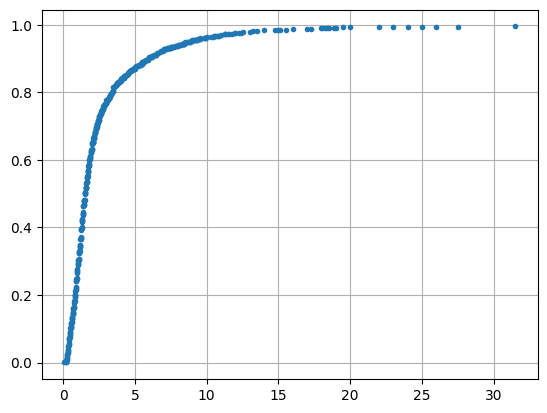

In [34]:
#ecdf plot
ecdf=df['price'].value_counts().sort_index().cumsum()/len(df['price'])
plt.plot(ecdf.index,ecdf,marker='.',linestyle='none')
plt.grid()

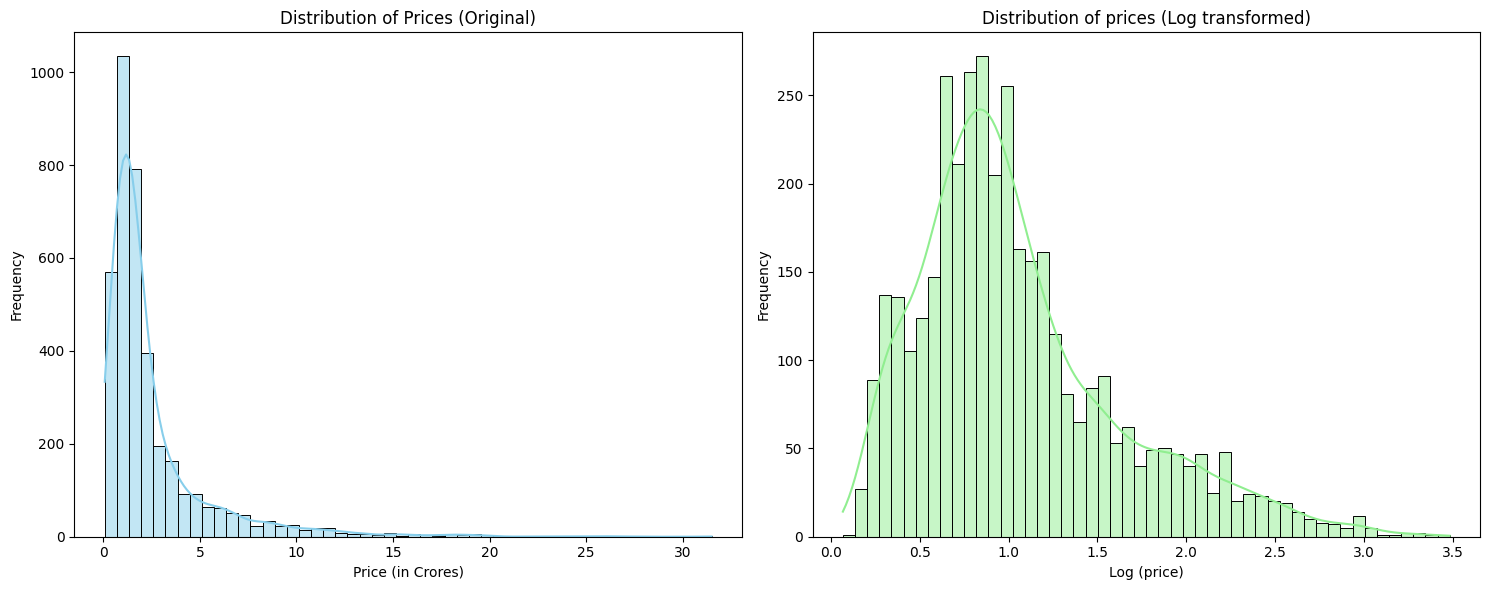

In [35]:
plt.figure(figsize=(15,6))
#Distribution plot without log transformation
plt.subplot(1,2,1)
sns.histplot(df['price'],kde=True,bins=50,color='skyblue')
plt.title("Distribution of Prices (Original)")
plt.xlabel("Price (in Crores)")
plt.ylabel("Frequency")

#Distribution plot with log trandformation
plt.subplot(1,2,2)
sns.histplot(np.log1p(df['price']),kde=True,bins=50,color='lightgreen')
plt.title("Distribution of prices (Log transformed)")
plt.xlabel("Log (price)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [37]:
#skewness and kurtosis
skewness=np.log1p(df['price']).skew()
kurtosis=np.log1p(df['price']).kurt()
print(skewness,kurtosis)

1.0830237140465715 1.006599721590867


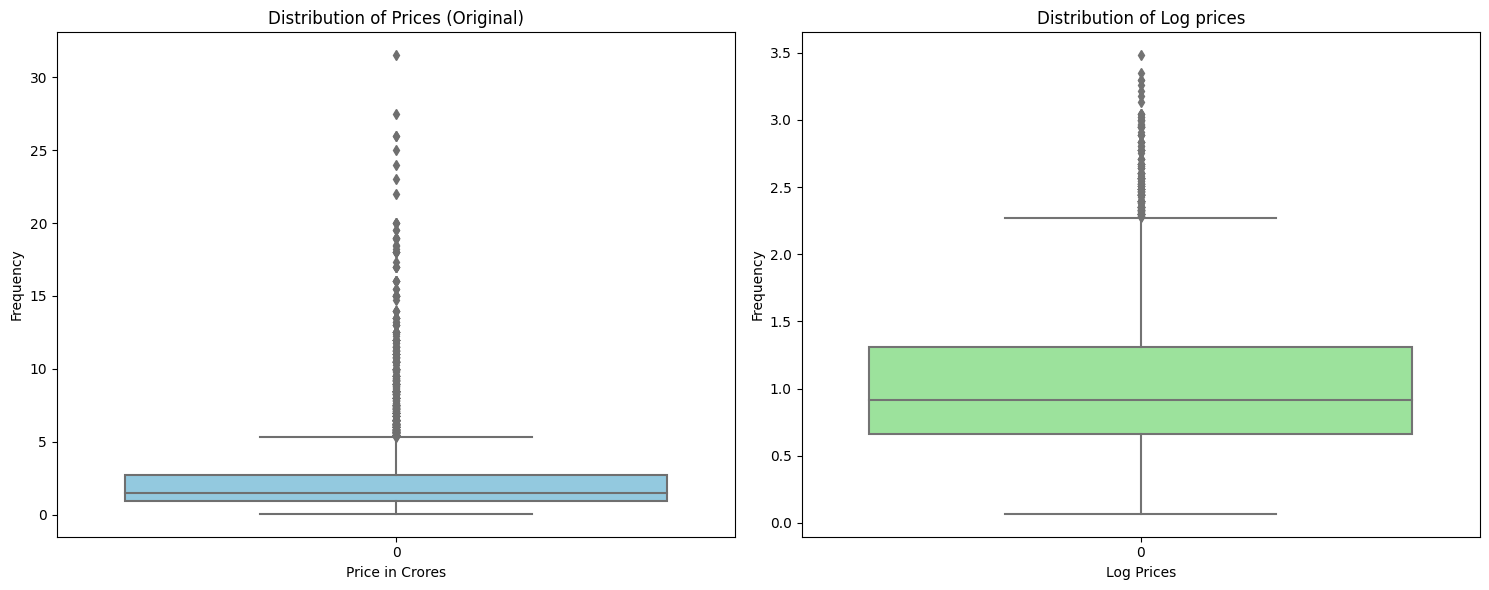

In [38]:
plt.figure(figsize=(15,6))
#Distribution plot without log transformation
plt.subplot(1,2,1)
sns.boxplot(df['price'],color='skyblue')
plt.title("Distribution of Prices (Original)")
plt.xlabel("Price in Crores")
plt.ylabel("Frequency")

#Distribution plot with log trandformation
plt.subplot(1,2,2)
sns.boxplot(np.log1p(df['price']),color='lightgreen')
plt.title("Distribution of Log prices")
plt.xlabel("Log Prices")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [39]:
#price per sqft
df['price_per_sqft'].isnull().sum()

18

In [40]:
df['price_per_sqft'].describe()

count      3785.000000
mean      13800.167768
std       23052.005585
min           4.000000
25%        6808.000000
50%        9000.000000
75%       13765.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

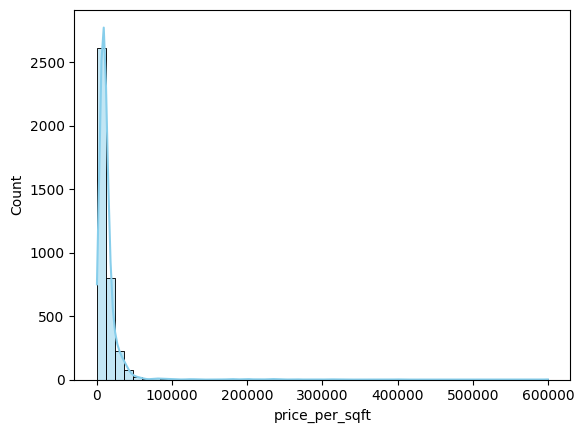

In [41]:
sns.histplot(df['price_per_sqft'],bins=50,color='skyblue',kde=True)

<Axes: >

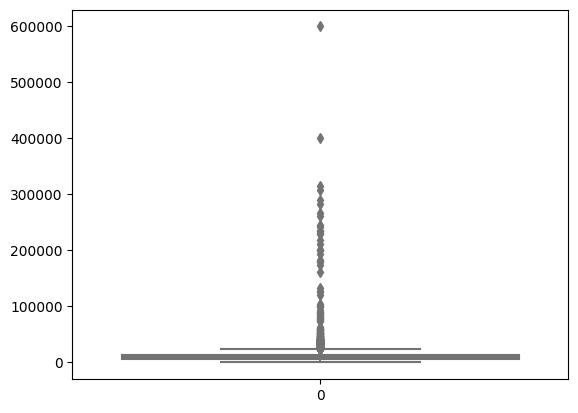

In [42]:
sns.boxplot(df['price_per_sqft'],color='lightgreen')

In [43]:
#bedroom
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

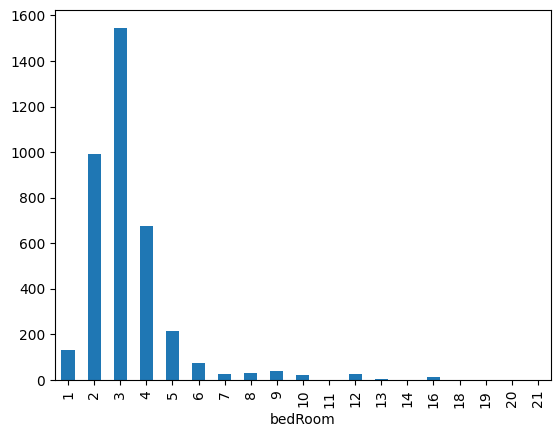

In [44]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

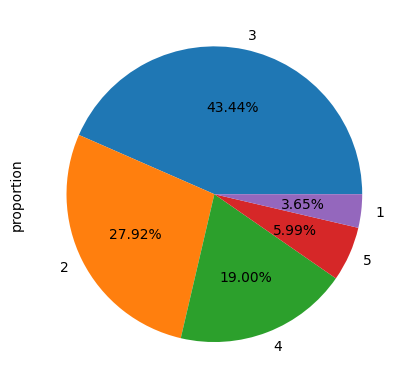

In [45]:
#df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [46]:
#bathroom
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

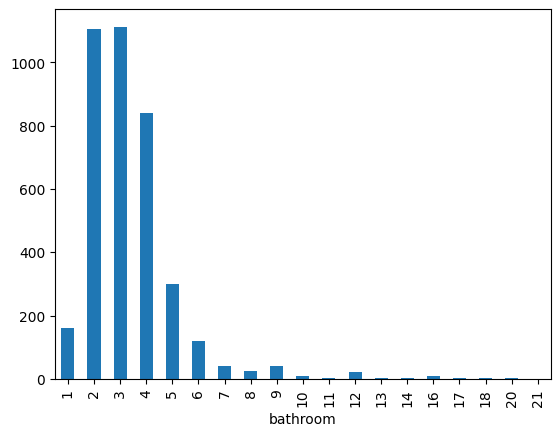

In [47]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

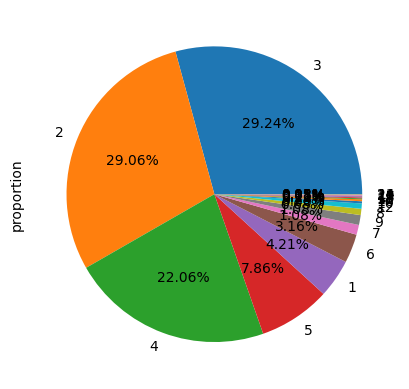

In [49]:
df['bathroom'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

In [51]:
df.head(2)

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,...,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxuary_score
0,0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,...,1081.0,NaN,650.0,0,0,0,0,0,2,8
1,1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,...,NaN,NaN,1103.0,0,1,1,0,0,2,38


In [52]:
#balcony
df['balcony'].isnull().sum()

0

<Axes: xlabel='balcony'>

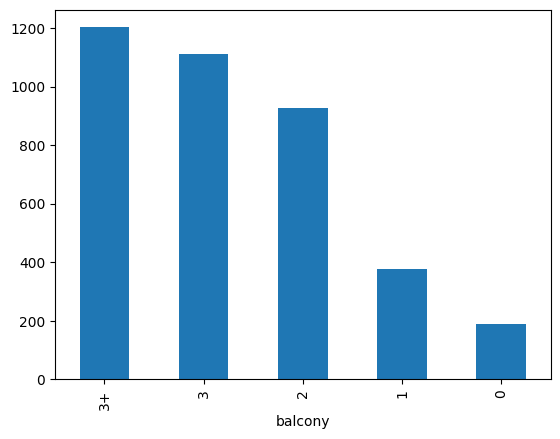

In [53]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

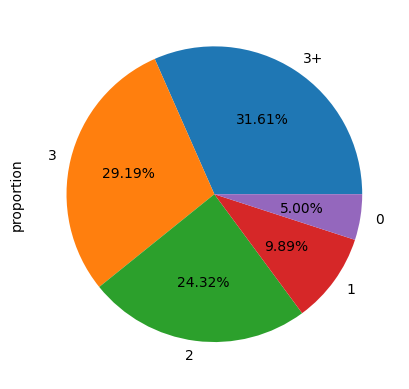

In [54]:
df['balcony'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

In [55]:
df.iloc[:,10:].head()

,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxuary_score
0,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,2,8
1,2,4.0,NaN,New Property,NaN,NaN,1103.0,0,1,1,0,0,2,38
2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,2,15
3,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,2,49
4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,0,1,0,1,0,174


In [56]:
df['floorNum'].isnull().sum()

19

In [57]:
df['floorNum'].describe()

count    3784.000000
mean        6.810254
std         6.027555
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

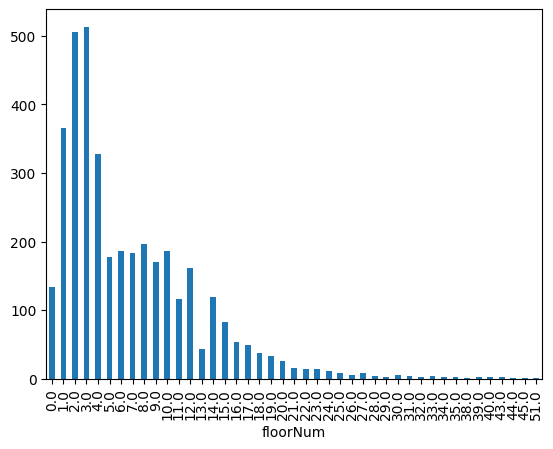

In [58]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: >

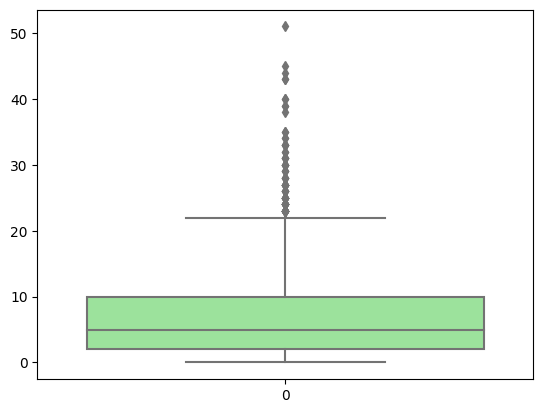

In [59]:
sns.boxplot(df['floorNum'],color='lightgreen')

In [60]:
#Facing
df['facing'].isnull().sum()

1105

In [61]:
df['facing'].fillna('NA',inplace=True)

In [62]:
df['facing'].value_counts()

facing
NA            1105
East           642
North-East     639
North          398
West           255
South          233
North-West     200
South-East     174
South-West     157
Name: count, dtype: int64

In [63]:
df['agePossession'].isnull().sum()

0

In [64]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [65]:
#areas
df['super_built_up_area'].isnull().sum()

1888

In [66]:
df['super_built_up_area'].describe()

count     1915.000000
mean      1921.658251
std        767.160169
min         89.000000
25%       1457.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

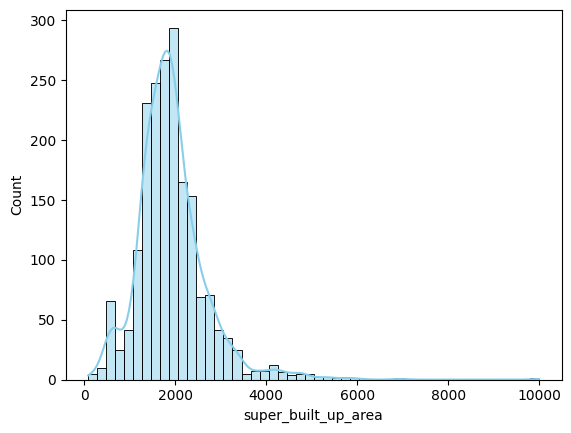

In [67]:
sns.histplot(df['super_built_up_area'].dropna(),bins=50,color='skyblue',kde=True)

<Axes: >

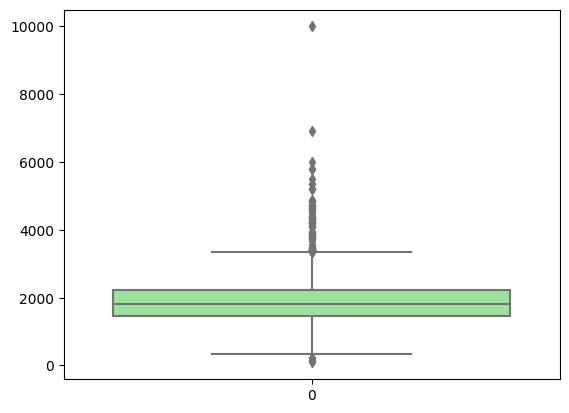

In [68]:
sns.boxplot(df['super_built_up_area'].dropna(),color='lightgreen')

In [69]:
#built up area
df['built_up_area'].isnull().sum()

2070

In [70]:
df['built_up_area'].describe()

count      1733.000000
mean       2360.241413
std       17719.603378
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2399.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

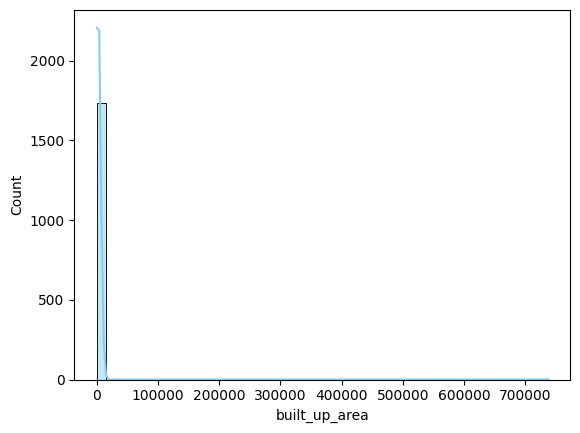

In [71]:
sns.histplot(df['built_up_area'].dropna(),bins=50,color='skyblue',kde=True)

In [75]:
#carpet area
df['carpet_area'].isnull().sum()

1859

In [76]:
df['carpet_area'].describe()

count      1944.000000
mean       2483.466943
std       22375.239293
min          15.000000
25%         824.000000
50%        1294.000000
75%        1786.250000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

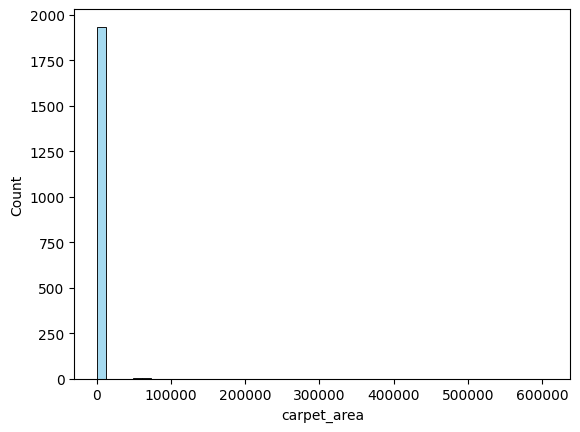

In [77]:
sns.histplot(df['carpet_area'].dropna(),bins=50,color='skyblue',kde=False)

<Axes: >

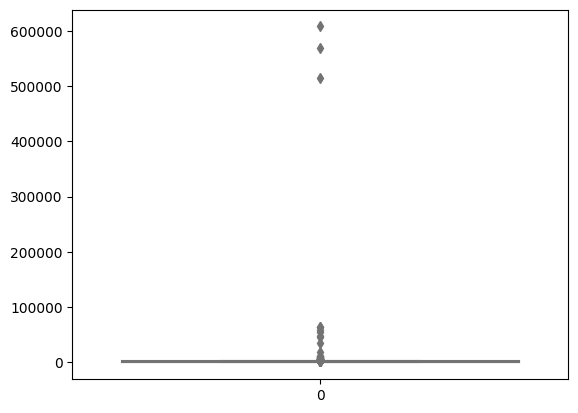

In [78]:
sns.boxplot(df['carpet_area'].dropna(),color='lightgreen')

In [79]:
df.iloc[:,16:]

,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxuary_score
0,650.0,0,0,0,0,0,2,8
1,1103.0,0,1,1,0,0,2,38
2,58141.0,0,0,0,0,0,2,15
3,585.0,0,0,0,0,0,2,49
4,1476.0,0,0,1,0,1,0,174
...,...,...,...,...,...,...,...,...
3798,483.0,0,0,0,0,0,2,73
3799,NaN,1,1,1,1,0,2,160
3800,NaN,0,0,0,0,0,0,67
3801,NaN,1,1,1,1,0,2,76


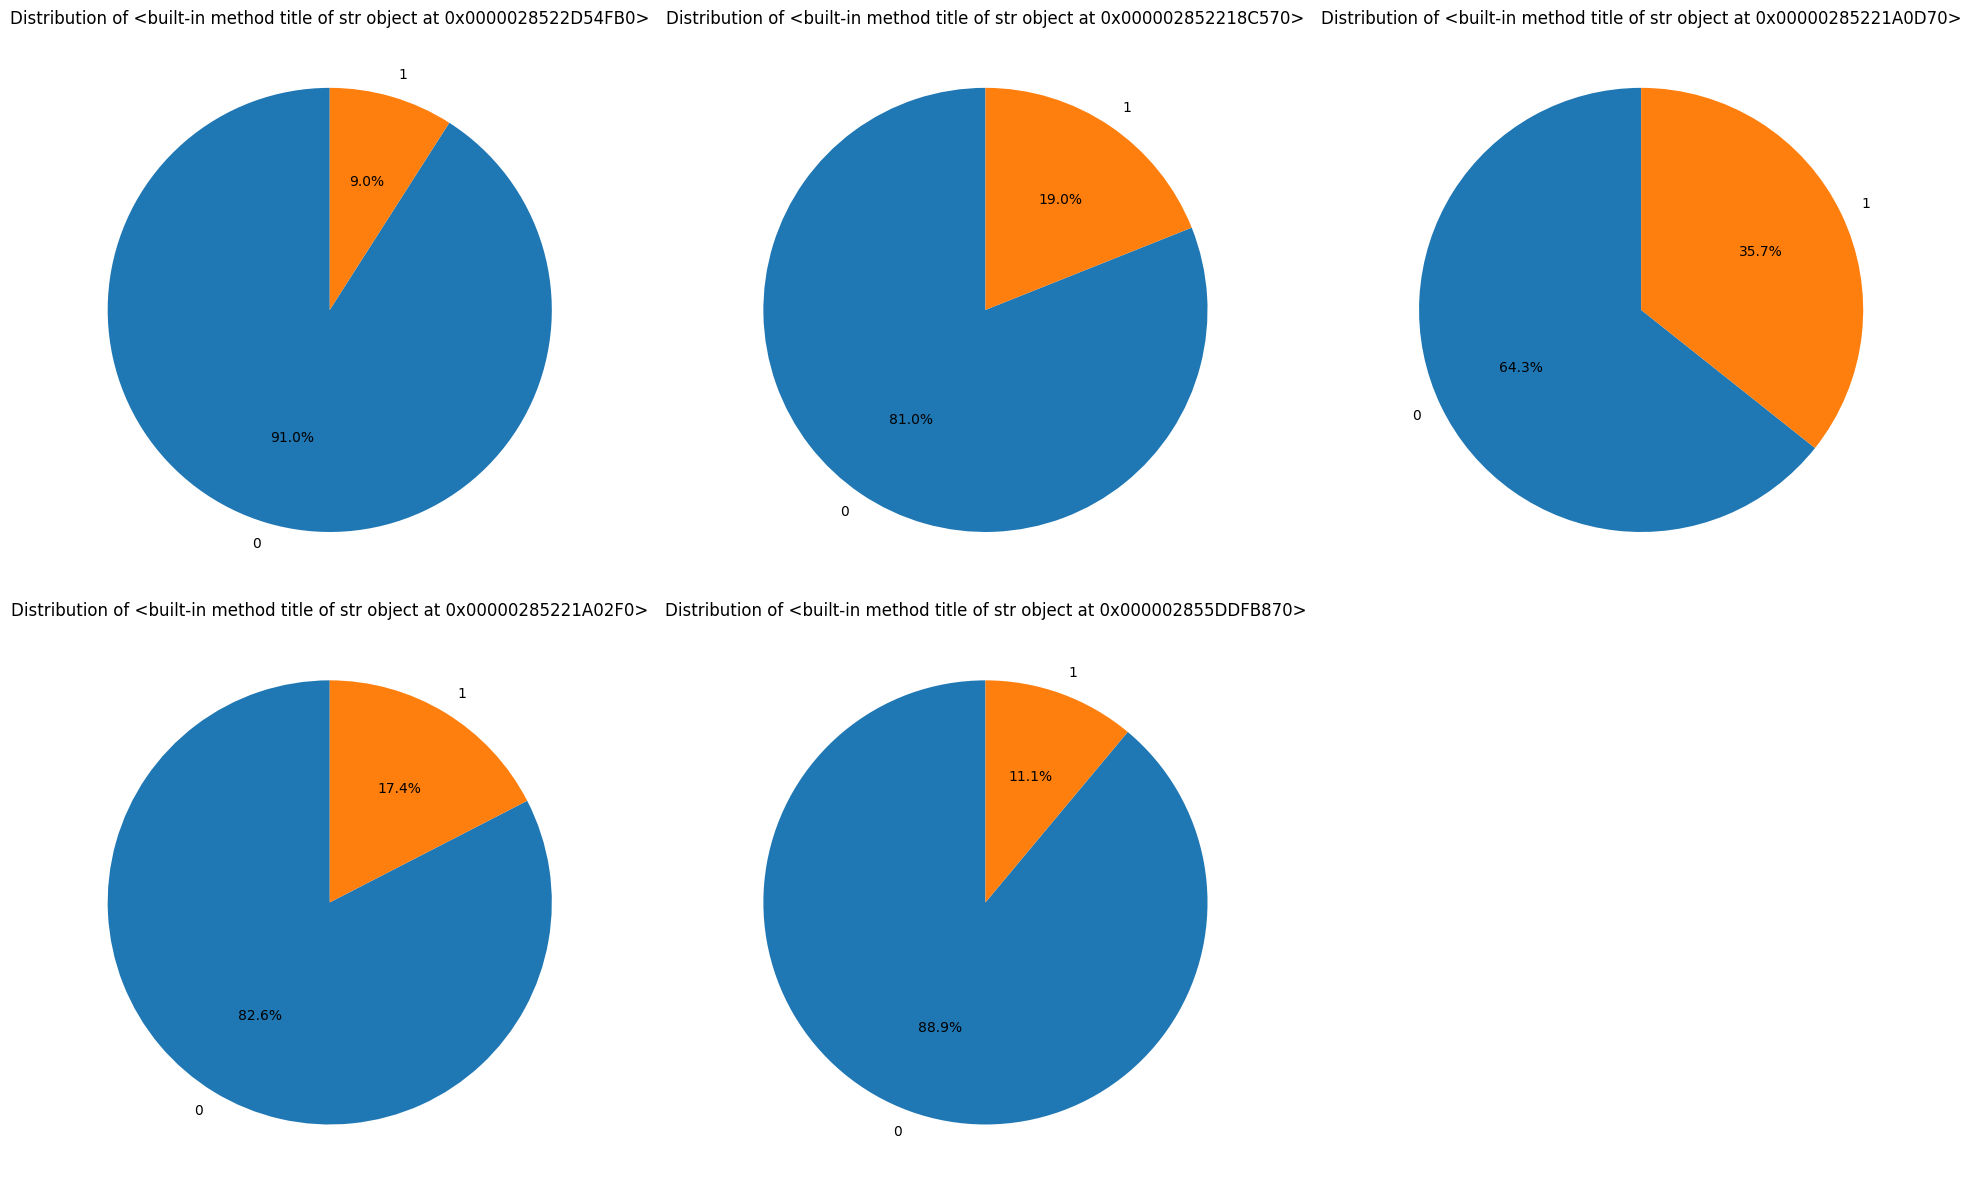

In [83]:
#additional room
plt.figure(figsize=(20,12))
#Create a subplot of pie charts for each room type
for idx,room in enumerate(['store room','study room','servant room','pooja room','others'],1):
    ax=plt.subplot(2,3,idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,ax=ax)
    plt.title(f"Distribution of {room.title}")
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [84]:
#plt.figure(figsize=(20, 12))
#
## Create a subplot of pie charts for each room type
#for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
#    ax = plt.subplot(2, 3, idx)
#    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
#    plt.title(f'Distribution of {room.title()}')
#    plt.ylabel('')
#
#plt.tight_layout()
#plt.show()

In [85]:
#furnishing type
df['furnishing_type'].value_counts()

furnishing_type
2    2509
0    1078
1     216
Name: count, dtype: int64

<Axes: ylabel='count'>

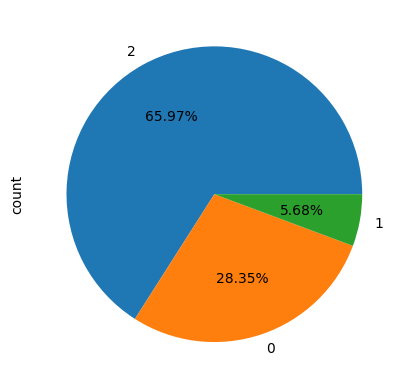

In [86]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [88]:
#luxuary score
df['luxuary_score'].isnull().sum()

0

In [89]:
df['luxuary_score'].describe()

count    3803.000000
mean       70.947936
std        52.821789
min         0.000000
25%        31.000000
50%        58.000000
75%       109.000000
max       174.000000
Name: luxuary_score, dtype: float64

<Axes: xlabel='luxuary_score', ylabel='Count'>

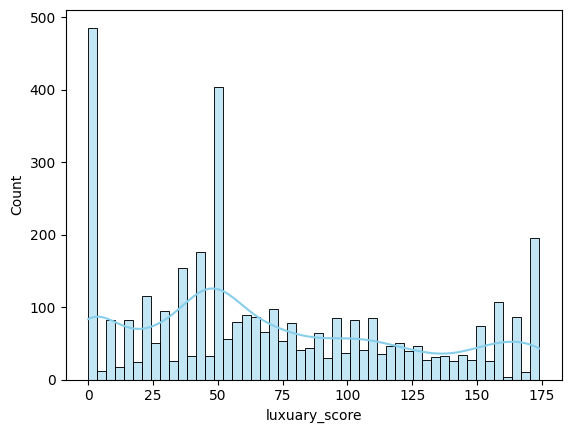

In [90]:
sns.histplot(df['luxuary_score'],bins=50,color='skyblue',kde=True)

<Axes: >

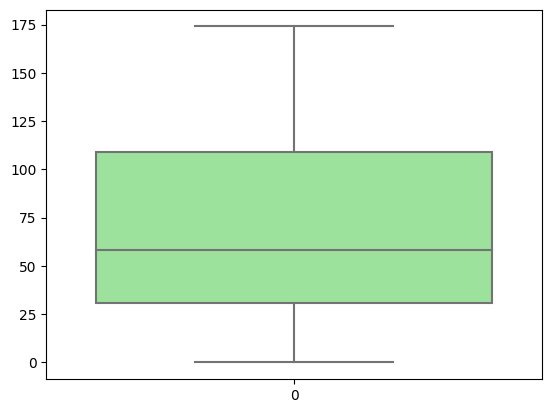

In [91]:
sns.boxplot(df['luxuary_score'],color='lightgreen')

In [92]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,...,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxuary_score
0,0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,...,1081.0,NaN,650.0,0,0,0,0,0,2,8
1,1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,...,NaN,NaN,1103.0,0,1,1,0,0,2,38
2,2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,...,NaN,NaN,58141.0,0,0,0,0,0,2,15
3,3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,...,NaN,1000.0,585.0,0,0,0,0,0,2,49
4,4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,...,1995.0,1615.0,1476.0,0,0,1,0,1,0,174
